In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load file
df = pd.read_csv('spamhamdata.csv', sep='\t', header=None, names=['label', 'message'], encoding='utf-8')

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [2]:
#Replace null or none values by an empty string Data cleaning
data = df.where((pd.notnull(df)), '')

In [3]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
data.shape

(5572, 2)

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])  # 'ham' -> 0, 'spam' -> 1


In [6]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

In [9]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [10]:
#checking after removing
df.duplicated().sum()

np.int64(0)

In [11]:
#shape has been reduced
df.shape

(5169, 2)

In [12]:
# Count spam and ham messages
message_counts = df['label'].value_counts()

# Display the counts
print(message_counts)

label
0    4516
1     653
Name: count, dtype: int64


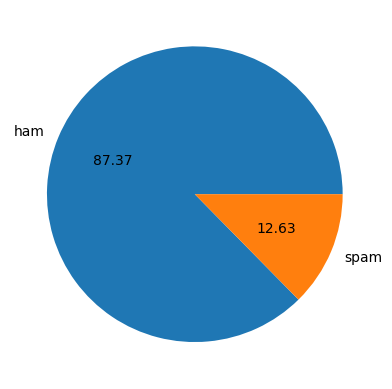

In [13]:
#Data is almost 88% ham sn 12% spam
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [14]:
# Load NLTK library and download the punkt tokenizer data for text processing
import nltk

nltk.download('punkt_tab')

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#numbers of characters used

df['num_characters'] = df['message'].apply(len)

In [16]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
#break sentence word by word
df['num_of_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
df.head()

,label,message,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
df['num_of_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,label,message,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,79.344941,18.593538,1.974076
std,58.439256,13.402779,1.458967
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
#Data for Ham messages
df[df['label'] == 0][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.906333,17.267715,1.827724
std,56.717234,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#Data for Spam messages
df[df['label'] == 1][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


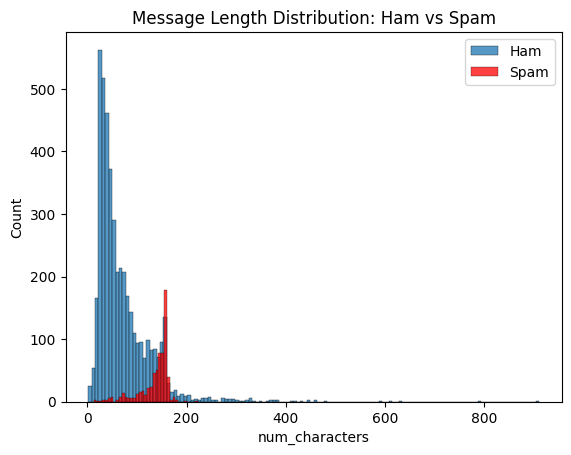

In [24]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graphics for Ham
sns.histplot(df.loc[df['label'] == 0, 'num_characters'])  # blue

# Graphics for Spam
sns.histplot(df.loc[df['label'] == 1, 'num_characters'], color='red')  # red

plt.xlabel('num_characters')
plt.ylabel('Count')
plt.title('Message Length Distribution: Ham vs Spam')
plt.legend(['Ham', 'Spam'])

plt.show()


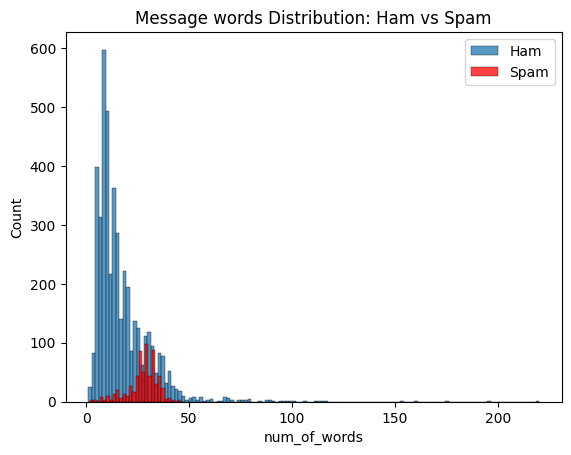

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graphics for Ham
sns.histplot(df.loc[df['label'] == 0, 'num_of_words'])  # blue

# Graphics for Spam
sns.histplot(df.loc[df['label'] == 1, 'num_of_words'], color='red')  # red

plt.xlabel('num_of_words')
plt.ylabel('Count')
plt.title('Message words Distribution: Ham vs Spam')
plt.legend(['Ham', 'Spam'])

plt.show()


Text(0.5, 1.02, ' Pairplot: Ham vs Spam Message Features')

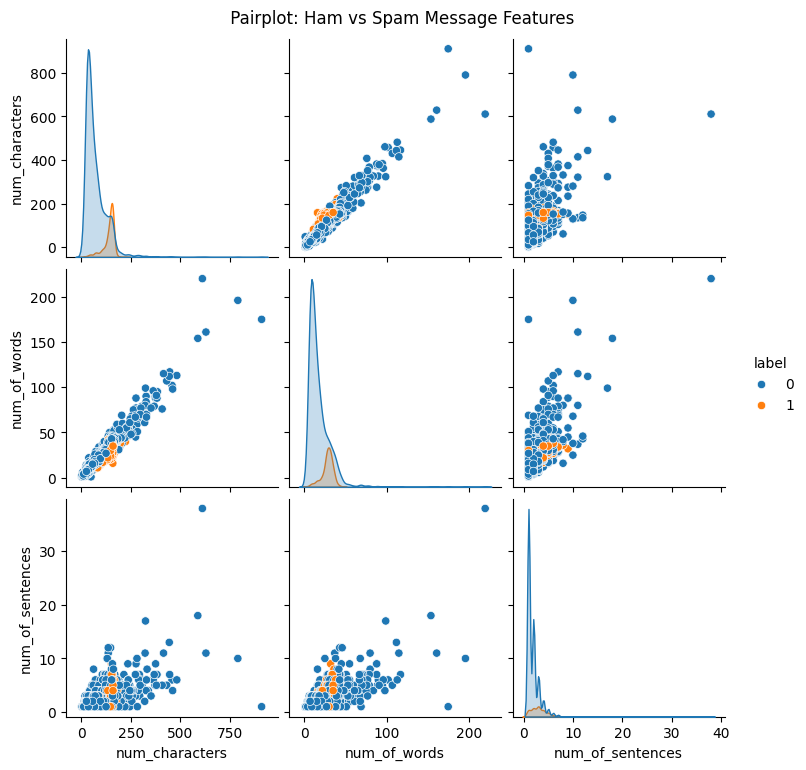

In [26]:
pairplot = sns.pairplot(df,hue='label')

pairplot.fig.suptitle(' Pairplot: Ham vs Spam Message Features', y=1.02)

<Axes: >

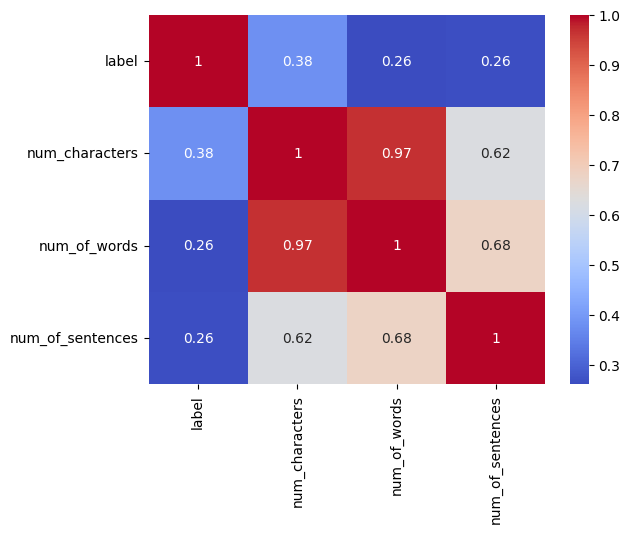

In [27]:
# Only numeric columns
numeric_df = df.select_dtypes(include='number')

# Heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [28]:
#Data Preprocessing

In [29]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


#Lower case
#Tokenize
#Remove special Characters and stop words
# stemming

def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    y=[]

    for i in message:
        if i.isalnum():
            y.append(i)

    message= y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    message= y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)



In [30]:
df['transformed_message'] = df['message'].apply(transform_message)

In [31]:
#Transformed text is added as a new column
df.head()

,label,message,num_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [32]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

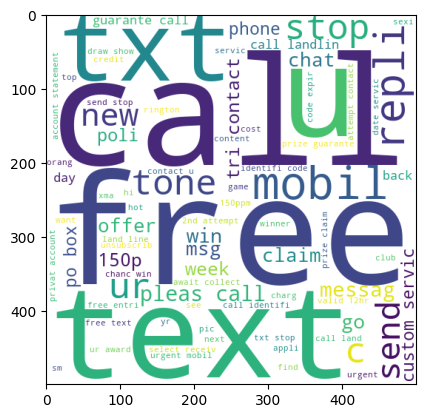

In [33]:
#this will show the most used words in Spam messages
spam_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

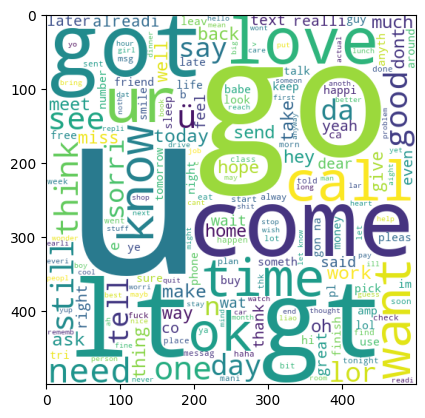

In [34]:
#this will show the most used words in Ham messages
ham_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=" "))

plt.imshow(ham_wc)

In [35]:
from collections import Counter
spam_words = []

for msg in  df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_words.append(word)

pd.DataFrame(Counter(spam_words).most_common(25))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,repli,103


In [36]:
ham_words = []

for msg in  df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_words.append(word)

pd.DataFrame(Counter(ham_words).most_common(25))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


In [ ]:
#Model building

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 
tfdif = TfidfVectorizer(max_features=3000, ngram_range=(1,2))

x = tfdif.fit_transform(df['transformed_message']).toarray()


y = df['label'].values


In [38]:
x.shape

(5169, 3000)

In [39]:
# #Min max scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# x = scaler.fit_transform(x)


In [40]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [41]:
# So countvectorizer and Mnb will be used
#machine learning models
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

models = {
    'LR': lr,
    'SVC': svc,
    'DTC': dtc,
    'KNN': knn,
    'RFC': rfc,
    'ABC': abc,
    'BC': bc,
    'ETC': etc,
    'GBC': gbc,
    'XGB': xgb,
    'MNB': mnb,
    'GNB': gnb,
    'BNB': bnb
}


In [42]:
def train_model(model, x_train, y_train, x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [43]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
   
    current_accuracy, current_presicion = train_model(model, x_train, y_train, x_test,y_test)

    print('For: ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_presicion) 

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_presicion)

    

For:  LR
Accuracy:  0.9516441005802708
Precision:  0.9634146341463414
For:  SVC
Accuracy:  0.9690522243713733
Precision:  0.9895833333333334
For:  DTC
Accuracy:  0.9555125725338491
Precision:  0.8448275862068966
For:  KNN
Accuracy:  0.9187620889748549
Precision:  1.0
For:  RFC
Accuracy:  0.9690522243713733
Precision:  0.97
For:  ABC
Accuracy:  0.9226305609284333
Precision:  0.7948717948717948
For:  BC
Accuracy:  0.9526112185686654
Precision:  0.8468468468468469
For:  ETC
Accuracy:  0.97678916827853
Precision:  0.9811320754716981
For:  GBC
Accuracy:  0.9564796905222437
Precision:  0.945054945054945
For:  XGB
Accuracy:  0.9690522243713733
Precision:  0.9433962264150944
For:  MNB
Accuracy:  0.9671179883945842
Precision:  1.0
For:  GNB
Accuracy:  0.8636363636363636
Precision:  0.4660633484162896
For:  BNB
Accuracy:  0.9738878143133463
Precision:  0.9805825242718447


In [44]:
performance_df = pd.DataFrame({'model':models.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

#MNB best model 
performance_df

,model,Accuracy,Precision
0,LR,0.951644,0.963415
1,SVC,0.969052,0.989583
2,DTC,0.955513,0.844828
3,KNN,0.918762,1.000000
4,RFC,0.969052,0.970000
5,ABC,0.922631,0.794872
6,BC,0.952611,0.846847
7,ETC,0.976789,0.981132
8,GBC,0.956480,0.945055
9,XGB,0.969052,0.943396


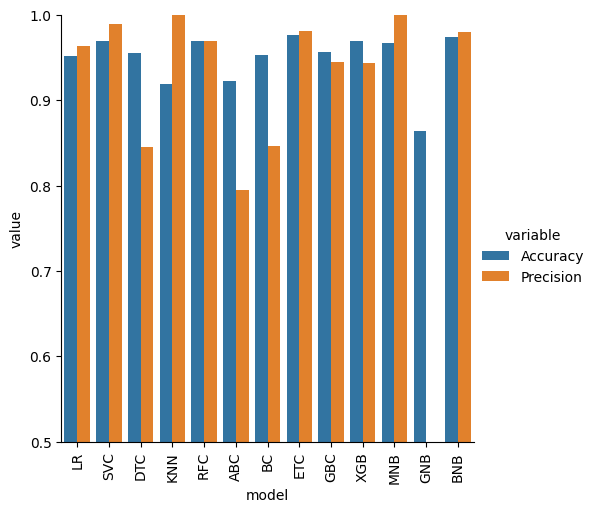

In [45]:
performance_df_graphic = pd.melt(performance_df, id_vars ='model')

sns.catplot(x= 'model', y = 'value', hue='variable', data=performance_df_graphic, kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
#Model Improve 
#Change the max_features 3000  parameters of TfIdf 

models_data = pd.DataFrame({'model':models.keys(), 'Accuracy_max_3000': accuracy_scores,'Precision_max_3000' : precision_scores })

performance_df.merge(models_data, on = 'model')

,model,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000
0,LR,0.951644,0.963415,0.951644,0.963415
1,SVC,0.969052,0.989583,0.969052,0.989583
2,DTC,0.955513,0.844828,0.955513,0.844828
3,KNN,0.918762,1.000000,0.918762,1.000000
4,RFC,0.969052,0.970000,0.969052,0.970000
5,ABC,0.922631,0.794872,0.922631,0.794872
6,BC,0.952611,0.846847,0.952611,0.846847
7,ETC,0.976789,0.981132,0.976789,0.981132
8,GBC,0.956480,0.945055,0.956480,0.945055
9,XGB,0.969052,0.943396,0.969052,0.943396


In [47]:
#Voting Classifier Combining models
from sklearn.ensemble import VotingClassifier

mnb = MultinomialNB()
svc = SVC(kernel='sigmoid',gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

voting = VotingClassifier(estimators=[('svc',svc),('mnb', mnb ),('etc', etc)],voting='soft')

voting.fit(x_train,y_train)

,estimators,"[('svc', ...), ('mnb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [48]:
y_pred = voting.predict(x_test)
print('accuracy', accuracy_score(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))

accuracy 0.97678916827853
precision 0.9903846153846154


In [49]:
# #Apply stacking
# from sklearn.ensemble import StackingClassifier

# estimators=[('svc',svc),('mnb', mnb ),('etc', etc)]
# final_estimator = RandomForestClassifier()

# model = StackingClassifier(estimators=estimators, final_estimator= final_estimator)

In [50]:
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# print('accuracy', accuracy_score(y_test,y_pred))
# print('precision', precision_score(y_test,y_pred))

In [51]:
import pickle 

pickle.dump(tfdif, open('vectorizer.pkl', 'wb'))

pickle.dump(voting, open('model.pkl', 'wb'))